In [1]:
from src import Pipeline, Plotter
from src.utils.utils_experiment import load_data
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'
X, Y, gene_ids = load_data(dataset)
pipe = Pipeline(X, config='configs/'+dataset+".ini", verbose=True, col_ids=gene_ids)
pipe.run()

Dim: Knee found at 12 components. Using n=12.
Clu: Finished clustering for k=2.
Clu: Finished clustering for k=4.
Clu: Best score achieved for k=4 at 0.24.
Mark: Finished finding markers for cluster 0.
Mark: Finished finding markers for cluster 1.
Mark: Finished finding markers for cluster 2.
Mark: Finished finding markers for cluster 3.
Ide: Finished finding lvl1 type for cluster=0.
Ide: Finished finding lvl1 type for cluster=1.
Ide: Finished finding lvl1 type for cluster=2.
Ide: Finished finding lvl1 type for cluster=3.
Ide: Finished finding lvl2 type for cluster=0.
Ide: Finished finding lvl2 type for cluster=1.
Ide: Finished finding lvl2 type for cluster=2.
Ide: Finished finding lvl2 type for cluster=3.


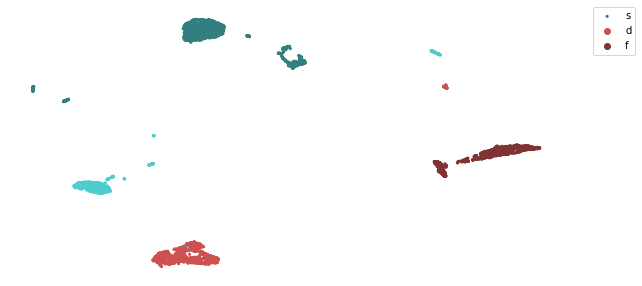

In [3]:
plotter = Plotter(pipe)
plotter.plot_clu()